In [1]:
import importlib
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from math import nan

from CASutils import plotting_utils as myplot
from CASutils import calendar_utils as cal

from scipy import stats

importlib.reload(myplot)
importlib.reload(cal)

<module 'CASutils.calendar_utils' from '/home/islas/python/CASanalysis/CASutils/calendar_utils.py'>

In [2]:
data = xr.open_dataset("/project/cas/islas/python_savs/snowpaper/DATA_SORT/trefhtptile_composites/3cities/"
                       +"trefhtptilecomposites_3cities_scam_clminit_60days.nc")

In [3]:
plotpath="/project/cas/islas/python_plots/snowpaper/FIGURES/"

In [4]:
def setupsnowplotcold(x1,x2,y1,y2, nsnowlev, xlim=(-17,0)):

    snowticks=["TSNO(1)","TSNO(2)","TSNO(3)","TSNO(4)","TSNO(5)","TSNO(6)"]
    snowticks2 = [snowticks[nsnowlev-1-i] for i in np.arange(0,nsnowlev,1)]
    yticknames=np.concatenate((["TSL"],snowticks2))
    yticknames=np.concatenate((yticknames,["TS","900","800","700"]))
    
    yticks = np.arange(-(1000+50*(nsnowlev+1))+25,-1000,50)
    yticks = np.concatenate((yticks,np.array([-1000])))
    yticks = np.concatenate((yticks,[-900,-800,-700]))
    
    print(-(1000+50*(nsnowlev+1)))
    
    
    ax = fig.add_axes(np.array([x1, y1, (x2-x1), (y2-y1)]))
    ax.set_xlim(xlim)
    ax.set_xticks([])
    ax.set_ylim(-(1000+50*(nsnowlev+1)),-700)
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticknames, fontsize=12)
    ax.set_xticks([-15,-10,-5,0])
    ax.set_xticklabels(['-15','-10','-5','0'], fontsize=12)
    ax.set_xlabel('Temperature (K)', fontsize=14)
    
    ax.text(-23.5,-850,'Pressure (hPa)', rotation='vertical', va='center', fontsize=12)
    
    for ilev in np.arange(-(1000+50*(nsnowlev+1)),-1000,50):
        ax.plot(xlim,[ilev,ilev], color='lightgray')
        
    ax.plot(xlim,[-(1000+50*(nsnowlev+1)-50),-(1000+50*(nsnowlev+1)-50)], color='black')
    ax.plot(xlim,[-1000,-1000], color='black')
    
    #ax.text(-23,-850,'Pressure (hPa)', rotation='vertical', va='center')
    
    return ax

def setupsnowplotwarm(x1,x2,y1,y2, nsnowlev, xlim=(0,17)):

    snowticks=[" "," "," "," "," "," "]
    snowticks2 = [snowticks[nsnowlev-1-i] for i in np.arange(0,nsnowlev,1)]
    yticknames=np.concatenate(([" "],snowticks2))
    yticknames=np.concatenate((yticknames,[" "," "," "," "]))
    
    yticks = np.arange(-(1000+50*(nsnowlev+1))+25,-1000,50)
    yticks = np.concatenate((yticks,np.array([-1000])))
    yticks = np.concatenate((yticks,[-900,-800,-700]))
    
    print(yticks.shape)
    print(yticknames.shape)
    
    
    ax = fig.add_axes(np.array([x1, y1, (x2-x1), (y2-y1)]))
    ax.set_xlim(xlim)
    ax.set_xticks([])
    ax.set_ylim(-(1000+50*(nsnowlev+1)),-700)
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticknames, fontsize=12)
    ax.set_xticks([0,5,10,15])
    ax.set_xticklabels(['0','5','10','15'], fontsize=12)
    ax.set_xlabel('Temperature (K)', fontsize=14)
    
    for ilev in np.arange(-(1000+50*(nsnowlev+1)),-1000,50):
        ax.plot(xlim,[ilev,ilev], color='lightgray')
        
    ax.plot(xlim,[-(1000+50*(nsnowlev+1)-50),-(1000+50*(nsnowlev+1)-50)], color='black')
    ax.plot(xlim,[-1000,-1000], color='black')
    
    return ax


Snow density PDFS

In [5]:
basepath="/project/cas/islas/python_savs/snowpaper/DATA_SORT/3cities/SCAM_CLMINIT_60days/"
snoliq_clm5_1 = xr.open_dataset(basepath+"SNO_LIQH2O_SCAM_CLM5_CLM5F_01.nc")
snoliq_clm5_2 = xr.open_dataset(basepath+"SNO_LIQH2O_SCAM_CLM5_CLM5F_02.nc")

snoice_clm5_1 = xr.open_dataset(basepath+"SNO_ICE_SCAM_CLM5_CLM5F_01.nc")
snoice_clm5_2 = xr.open_dataset(basepath+"SNO_ICE_SCAM_CLM5_CLM5F_02.nc")

snoz_clm5_1 = xr.open_dataset(basepath+"SNO_Z_SCAM_CLM5_CLM5F_01.nc")
snoz_clm5_2 = xr.open_dataset(basepath+"SNO_Z_SCAM_CLM5_CLM5F_02.nc")

snoliq_clm5_djf_1 = cal.group_season_daily(snoliq_clm5_1.snoliq,"DJF")
snoliq_clm5_djf_2 = cal.group_season_daily(snoliq_clm5_2.snoliq,"DJF")
snoliq_clm5_djf = np.concatenate([np.array(snoliq_clm5_djf_1),np.array(snoliq_clm5_djf_2)], axis=0)

snoice_clm5_djf_1 = cal.group_season_daily(snoice_clm5_1.snoice,"DJF")
snoice_clm5_djf_2 = cal.group_season_daily(snoice_clm5_2.snoice,"DJF")
snoice_clm5_djf = np.concatenate([np.array(snoice_clm5_djf_1),np.array(snoice_clm5_djf_2)], axis=0)

snoz_clm5_djf_1 = cal.group_season_daily(snoz_clm5_1.snoz,"DJF")
snoz_clm5_djf_2 = cal.group_season_daily(snoz_clm5_2.snoz,"DJF")
snoz_clm5_djf = np.concatenate([np.array(snoz_clm5_djf_1),np.array(snoz_clm5_djf_2)], axis=0)

rhosno_clm5_djf = (snoice_clm5_djf + snoliq_clm5_djf)/snoz_clm5_djf

nyears=35.0
nyears=35.0
nyears=35.0
nyears=35.0
nyears=35.0
nyears=35.0


In [6]:
basepath="/project/cas/islas/python_savs/snowpaper/DATA_SORT/3cities/SCAM_CLMINIT_60days/"
snoliq_snowd_1 = xr.open_dataset(basepath+"SNO_LIQH2O_SCAM_SNOWD_SNOWDF_01.nc")
snoliq_snowd_2 = xr.open_dataset(basepath+"SNO_LIQH2O_SCAM_SNOWD_SNOWDF_02.nc")

snoice_snowd_1 = xr.open_dataset(basepath+"SNO_ICE_SCAM_SNOWD_SNOWDF_01.nc")
snoice_snowd_2 = xr.open_dataset(basepath+"SNO_ICE_SCAM_SNOWD_SNOWDF_02.nc")

snoz_snowd_1 = xr.open_dataset(basepath+"SNO_Z_SCAM_SNOWD_SNOWDF_01.nc")
snoz_snowd_2 = xr.open_dataset(basepath+"SNO_Z_SCAM_SNOWD_SNOWDF_02.nc")

snoliq_snowd_djf_1 = cal.group_season_daily(snoliq_snowd_1.snoliq,"DJF")
snoliq_snowd_djf_2 = cal.group_season_daily(snoliq_snowd_2.snoliq,"DJF")
snoliq_snowd_djf = np.concatenate([np.array(snoliq_snowd_djf_1),np.array(snoliq_snowd_djf_2)], axis=0)

snoice_snowd_djf_1 = cal.group_season_daily(snoice_snowd_1.snoice,"DJF")
snoice_snowd_djf_2 = cal.group_season_daily(snoice_snowd_2.snoice,"DJF")
snoice_snowd_djf = np.concatenate([np.array(snoice_snowd_djf_1),np.array(snoice_snowd_djf_2)], axis=0)

snoz_snowd_djf_1 = cal.group_season_daily(snoz_snowd_1.snoz,"DJF")
snoz_snowd_djf_2 = cal.group_season_daily(snoz_snowd_2.snoz,"DJF")
snoz_snowd_djf = np.concatenate([np.array(snoz_snowd_djf_1),np.array(snoz_snowd_djf_2)], axis=0)

rhosno_snowd_djf = (snoice_snowd_djf + snoliq_snowd_djf)/snoz_snowd_djf

nyears=35.0
nyears=35.0
nyears=35.0
nyears=35.0
nyears=35.0
nyears=35.0


In [7]:
bsize=20
bins = np.arange(0,1000,bsize)
clm5pdf = np.zeros([bins.size,5,3])
snowdpdf = np.zeros([bins.size,5,3])
for icity in np.arange(0,3,1):
    for ilev in np.arange(0,6,1):
        rhoclm5 = rhosno_clm5_djf[:,:,ilev,icity].flatten()
        rhoclm5 = rhoclm5[~np.isnan(rhoclm5)]
        rhosnowd = rhosno_snowd_djf[:,:,ilev,icity].flatten()
        rhosnowd = rhosnowd[~np.isnan(rhosnowd)]
        try:
            kernel = stats.gaussian_kde(rhoclm5)
            clm5pdf[:,ilev,icity] = kernel(bins)*100.*bsize
            #clm5pdf[:,ilev,icity] = np.where(clm5pdf[:,ilev,icity] > 0.1, clm5pdf[:,ilev,icity], nan)
        except:
            pass

        try:
            kernel = stats.gaussian_kde(rhosnowd)
            snowdpdf[:,ilev,icity] = kernel(bins)*100.*bsize
            #snowdpdf[:,ilev,icity] = np.where(snowdpdf[:,ilev,icity] > 0.1, snowdpdf[:,ilev,icity], nan)
        except:
            pass
        

In [8]:
def setuprhosnopdf(fig, titlestr, x1, x2, y1, y2):
    ax = fig.add_axes([x1, y1, (x2-x1), (y2-y1)])
    ax.set_ylim(0,5)
    #ax.set_yticks([0,0.35,0.7,1,1.35,1.7,2,2.35,2.7,3,3.35,3.7,4,4.35,4.7])
    #ax.set_yticklabels([0,7,14,0,7,14,0,7,14,0,7,14,0,7,14])
    ax.set_yticks([0,0.4,0.8,1.4,1.8,2.4,2.8,3.4,3.8,4.4,4.8])
    ax.set_yticklabels([0,20,40,20,40,20,40,20,40,20,40], fontsize=12)
    ax.set_xlim(0,1000)
    ax.set_xticks([0,200,400,600,800,1000])
    ax.set_xticklabels(['0','200','400','600','800',' '], fontsize=12)
    ax.set_xlabel('Snow density kgm$^{-3}$', fontsize=14)
    ax.set_ylabel('Probability (%)', fontsize=14)
    ax.set_title(titlestr, fontsize=16)
    for i in np.arange(1,5,1):
        ax.plot([0,800],[i,i], color='darkgray')
    return ax

-1300
(10,)
(10,)
-1300
(10,)
(10,)
-1300
(10,)
(10,)


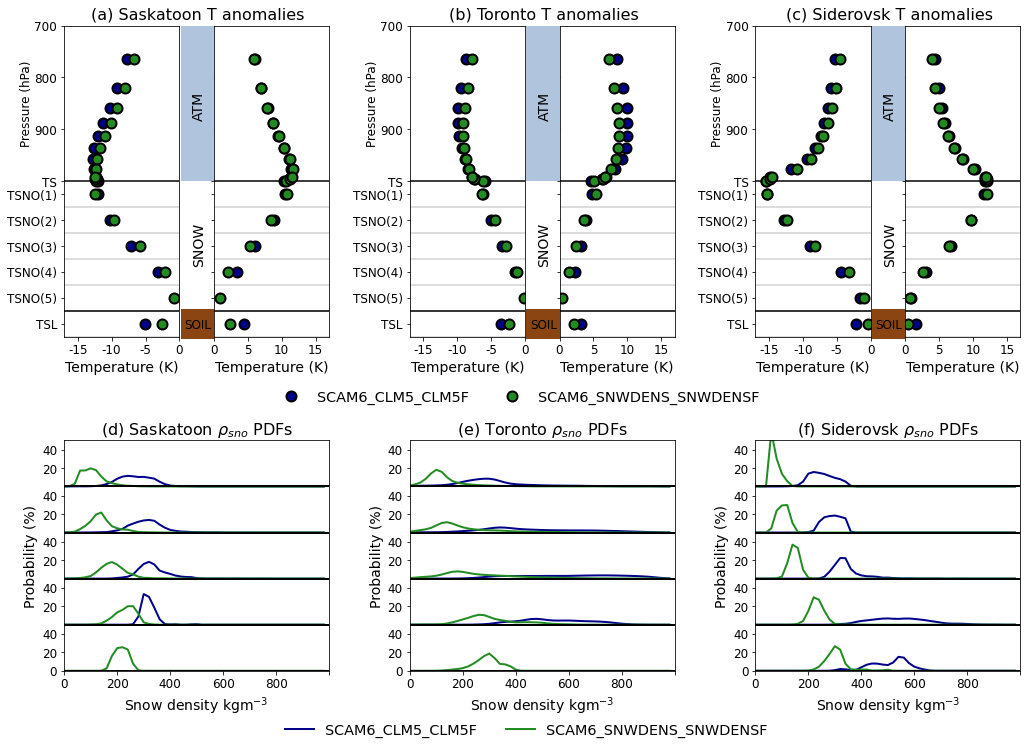

In [9]:
fig = plt.figure(figsize=(16,16))

#-------SASKATOON------------------------
cityplot=0 ; ptileplot=0
snot_clm5 = data.snot_clm5.isel(city=cityplot, ptile=ptileplot) ; snot_snowd = data.snot_snowd.isel(city=cityplot, ptile=ptileplot)
snot_clm5 = snot_clm5[~np.isnan(snot_clm5)] ; snot_snowd = snot_snowd[~np.isnan(snot_snowd)]
tsl_clm5 = data.tsl_clm5.isel(city=cityplot, ptile=ptileplot) ; tsl_snowd = data.tsl_snowd.isel(city=cityplot, ptile=ptileplot)
ts_clm5 = data.ts_clm5.isel(city=cityplot, ptile=ptileplot) ; ts_snowd = data.ts_snowd.isel(city=cityplot, ptile=ptileplot)
trefht_clm5 = data.trefht_clm5.isel(city=cityplot, ptile=ptileplot) ; trefht_snowd = data.trefht_snowd.isel(city=cityplot, ptile=ptileplot)
tbot_clm5 = data.tbot_clm5.isel(city=cityplot, ptile=ptileplot) ; tbot_snowd = data.tbot_snowd.isel(city=cityplot, ptile=ptileplot)
t_clm5 = data.t_clm5.isel(city=cityplot, ptile=ptileplot) ; t_snowd = data.t_snowd.isel(city=cityplot, ptile=ptileplot)
t_clm5 = t_clm5[t_clm5.lev > 700] ; t_snowd = t_snowd[t_snowd.lev > 700]
lev = t_clm5.lev[t_clm5.lev > 700] ; lev = t_snowd.lev[t_snowd.lev > 700]
nlevclm5 = snot_clm5.size ; nlevsnowd = snot_snowd.size
nlev = max(nlevclm5,nlevsnowd)

ax = setupsnowplotcold(0.1,0.2,0.7,0.97, nlev)

ax.plot(ts_clm5,-1000,"o", markerfacecolor="darkblue", markeredgecolor="black", markersize=10, markeredgewidth=2)
ax.plot(trefht_clm5,-995,"o", markerfacecolor="darkblue", markeredgecolor="black", markersize=10, markeredgewidth=2)
ax.plot(snot_clm5, -(1000 + np.arange(0, snot_clm5.size,1)*50+25),"o", markerfacecolor='darkblue', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax.plot(tsl_clm5,-( 1000 + (nlev+1)*50)+25,"o", markerfacecolor='darkblue', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax.plot(t_clm5,-1*lev,"o", markerfacecolor='darkblue', markeredgecolor='black', markersize=10, markeredgewidth=2)

ax.plot(ts_snowd,-1000,"o", markerfacecolor="forestgreen", markeredgecolor="black", markersize=10, markeredgewidth=2)
ax.plot(trefht_snowd,-995,"o", markerfacecolor="forestgreen", markeredgecolor="black", markersize=10, markeredgewidth=2)
ax.plot(snot_snowd, -(1000 + np.arange(0, snot_snowd.size,1)*50+25),"o", markerfacecolor='forestgreen', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax.plot(tsl_snowd,-(1000 + (nlev+1)*50)+25,"o", markerfacecolor='forestgreen', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax.plot(t_snowd,-1*lev,"o", markerfacecolor='forestgreen', markeredgecolor='black', markersize=10, markeredgewidth=2)


cityplot=0 ; ptileplot=9
snot_clm5 = data.snot_clm5.isel(city=cityplot, ptile=ptileplot) ; snot_snowd = data.snot_snowd.isel(city=cityplot, ptile=ptileplot)
snot_clm5 = snot_clm5[~np.isnan(snot_clm5)] ; snot_snowd = snot_snowd[~np.isnan(snot_snowd)]
tsl_clm5 = data.tsl_clm5.isel(city=cityplot, ptile=ptileplot) ; tsl_snowd = data.tsl_snowd.isel(city=cityplot, ptile=ptileplot)
ts_clm5 = data.ts_clm5.isel(city=cityplot, ptile=ptileplot) ; ts_snowd = data.ts_snowd.isel(city=cityplot, ptile=ptileplot)
trefht_clm5 = data.trefht_clm5.isel(city=cityplot, ptile=ptileplot) ; trefht_snowd = data.trefht_snowd.isel(city=cityplot, ptile=ptileplot)
tbot_clm5 = data.tbot_clm5.isel(city=cityplot, ptile=ptileplot) ; tbot_snowd = data.tbot_snowd.isel(city=cityplot, ptile=ptileplot)
t_clm5 = data.t_clm5.isel(city=cityplot, ptile=ptileplot) ; t_snowd = data.t_snowd.isel(city=cityplot, ptile=ptileplot)
t_clm5 = t_clm5[t_clm5.lev > 700] ; t_snowd = t_snowd[t_snowd.lev > 700]
lev = t_clm5.lev[t_clm5.lev > 700] ; lev = t_snowd.lev[t_snowd.lev > 700]
nlevclm5 = snot_clm5.size ; nlevsnowd = snot_snowd.size
nlev = max(nlevclm5,nlevsnowd)

ax = setupsnowplotwarm(0.23,0.33,0.7,0.97, nlev)

ax.plot(ts_clm5,-1000,"o", markerfacecolor="darkblue", markeredgecolor="black", markersize=10, markeredgewidth=2)
ax.plot(trefht_clm5,-995,"o", markerfacecolor="darkblue", markeredgecolor="black", markersize=10, markeredgewidth=2)
ax.plot(snot_clm5, -(1000 + np.arange(0, snot_clm5.size,1)*50+25),"o", markerfacecolor='darkblue', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax.plot(tsl_clm5,-( 1000 + (nlev+1)*50)+25,"o", markerfacecolor='darkblue', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax.plot(t_clm5,-1*lev,"o", markerfacecolor='darkblue', markeredgecolor='black', markersize=10, markeredgewidth=2)

ax.plot(ts_snowd,-1000,"o", markerfacecolor="forestgreen", markeredgecolor="black", markersize=10, markeredgewidth=2)
ax.plot(trefht_snowd,-995,"o", markerfacecolor="forestgreen", markeredgecolor="black", markersize=10, markeredgewidth=2)
ax.plot(snot_snowd, -(1000 + np.arange(0, snot_snowd.size,1)*50+25),"o", markerfacecolor='forestgreen', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax.plot(tsl_snowd,-(1000 + (nlev+1)*50)+25,"o", markerfacecolor='forestgreen', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax.plot(t_snowd,-1*lev,"o", markerfacecolor='forestgreen', markeredgecolor='black', markersize=10, markeredgewidth=2)


ax2 = myplot.plotbox(fig, 0.201,0.23,0.698,0.7244, color='saddlebrown')
ax2 = myplot.plotbox(fig, 0.201,0.23,0.835,0.97, color='lightsteelblue')
fig.text(0.217, 0.9, 'ATM', rotation='vertical', ha='center', va='center', fontsize=14)
fig.text(0.217, 0.78, 'SNOW', rotation='vertical', ha='center', va='center', fontsize=14)
fig.text(0.216, 0.71,'SOIL',rotation='horizontal', ha='center', va='center', fontsize=12)
fig.text(0.216, 0.98,'(a) Saskatoon T anomalies', fontsize=16, ha='center', va='center')


ax = setuprhosnopdf(fig, '(d) Saskatoon $\\rho_{sno}$ PDFs',0.1,0.33,0.41,0.61)
for ilev in np.arange(0,nlevclm5,1):
    ax.plot(bins,5 - (ilev+1) + clm5pdf[:,ilev,cityplot]/50., linewidth=2, color='darkblue')

for ilev in np.arange(0,nlevsnowd,1):
    ax.plot(bins,5 - (ilev+1) + snowdpdf[:,ilev,cityplot]/50., linewidth=2, color='forestgreen')

for i in np.arange(0,5,1):
        ax.plot([0,1000],[i,i], color='black', linewidth=2)   
#---------------------------------------------------------


#-------TORONTO------------------------
xx = 0.3
cityplot=1 ; ptileplot=0
snot_clm5 = data.snot_clm5.isel(city=cityplot, ptile=ptileplot) ; snot_snowd = data.snot_snowd.isel(city=cityplot, ptile=ptileplot)
snot_clm5 = snot_clm5[~np.isnan(snot_clm5)] ; snot_snowd = snot_snowd[~np.isnan(snot_snowd)]
tsl_clm5 = data.tsl_clm5.isel(city=cityplot, ptile=ptileplot) ; tsl_snowd = data.tsl_snowd.isel(city=cityplot, ptile=ptileplot)
ts_clm5 = data.ts_clm5.isel(city=cityplot, ptile=ptileplot) ; ts_snowd = data.ts_snowd.isel(city=cityplot, ptile=ptileplot)
trefht_clm5 = data.trefht_clm5.isel(city=cityplot, ptile=ptileplot) ; trefht_snowd = data.trefht_snowd.isel(city=cityplot, ptile=ptileplot)
tbot_clm5 = data.tbot_clm5.isel(city=cityplot, ptile=ptileplot) ; tbot_snowd = data.tbot_snowd.isel(city=cityplot, ptile=ptileplot)
t_clm5 = data.t_clm5.isel(city=cityplot, ptile=ptileplot) ; t_snowd = data.t_snowd.isel(city=cityplot, ptile=ptileplot)
t_clm5 = t_clm5[t_clm5.lev > 700] ; t_snowd = t_snowd[t_snowd.lev > 700]
lev = t_clm5.lev[t_clm5.lev > 700] ; lev = t_snowd.lev[t_snowd.lev > 700]
nlevclm5 = snot_clm5.size ; nlevsnowd = snot_snowd.size
nlev = max(nlevclm5,nlevsnowd)

ax = setupsnowplotcold(0.1+xx,0.2+xx,0.7,0.97, nlev)

ax.plot(ts_clm5,-1000,"o", markerfacecolor="darkblue", markeredgecolor="black", markersize=10, markeredgewidth=2)
ax.plot(trefht_clm5,-995,"o", markerfacecolor="darkblue", markeredgecolor="black", markersize=10, markeredgewidth=2)
ax.plot(snot_clm5, -(1000 + np.arange(0, snot_clm5.size,1)*50+25),"o", markerfacecolor='darkblue', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax.plot(tsl_clm5,-( 1000 + (nlev+1)*50)+25,"o", markerfacecolor='darkblue', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax.plot(t_clm5,-1*lev,"o", markerfacecolor='darkblue', markeredgecolor='black', markersize=10, markeredgewidth=2)

ax.plot(ts_snowd,-1000,"o", markerfacecolor="forestgreen", markeredgecolor="black", markersize=10, markeredgewidth=2)
ax.plot(trefht_snowd,-995,"o", markerfacecolor="forestgreen", markeredgecolor="black", markersize=10, markeredgewidth=2)
ax.plot(snot_snowd, -(1000 + np.arange(0, snot_snowd.size,1)*50+25),"o", markerfacecolor='forestgreen', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax.plot(tsl_snowd,-(1000 + (nlev+1)*50)+25,"o", markerfacecolor='forestgreen', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax.plot(t_snowd,-1*lev,"o", markerfacecolor='forestgreen', markeredgecolor='black', markersize=10, markeredgewidth=2)


cityplot=1 ; ptileplot=9
snot_clm5 = data.snot_clm5.isel(city=cityplot, ptile=ptileplot) ; snot_snowd = data.snot_snowd.isel(city=cityplot, ptile=ptileplot)
snot_clm5 = snot_clm5[~np.isnan(snot_clm5)] ; snot_snowd = snot_snowd[~np.isnan(snot_snowd)]
tsl_clm5 = data.tsl_clm5.isel(city=cityplot, ptile=ptileplot) ; tsl_snowd = data.tsl_snowd.isel(city=cityplot, ptile=ptileplot)
ts_clm5 = data.ts_clm5.isel(city=cityplot, ptile=ptileplot) ; ts_snowd = data.ts_snowd.isel(city=cityplot, ptile=ptileplot)
trefht_clm5 = data.trefht_clm5.isel(city=cityplot, ptile=ptileplot) ; trefht_snowd = data.trefht_snowd.isel(city=cityplot, ptile=ptileplot)
tbot_clm5 = data.tbot_clm5.isel(city=cityplot, ptile=ptileplot) ; tbot_snowd = data.tbot_snowd.isel(city=cityplot, ptile=ptileplot)
t_clm5 = data.t_clm5.isel(city=cityplot, ptile=ptileplot) ; t_snowd = data.t_snowd.isel(city=cityplot, ptile=ptileplot)
t_clm5 = t_clm5[t_clm5.lev > 700] ; t_snowd = t_snowd[t_snowd.lev > 700]
lev = t_clm5.lev[t_clm5.lev > 700] ; lev = t_snowd.lev[t_snowd.lev > 700]
nlevclm5 = snot_clm5.size ; nlevsnowd = snot_snowd.size
nlev = max(nlevclm5,nlevsnowd)

ax = setupsnowplotwarm(0.23+xx,0.33+xx,0.7,0.97, nlev)

ax.plot(ts_clm5,-1000,"o", markerfacecolor="darkblue", markeredgecolor="black", markersize=10, markeredgewidth=2, label='SCAM6_CLM5_CLM5F')
ax.plot(trefht_clm5,-995,"o", markerfacecolor="darkblue", markeredgecolor="black", markersize=10, markeredgewidth=2)
ax.plot(snot_clm5, -(1000 + np.arange(0, snot_clm5.size,1)*50+25),"o", markerfacecolor='darkblue', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax.plot(tsl_clm5,-( 1000 + (nlev+1)*50)+25,"o", markerfacecolor='darkblue', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax.plot(t_clm5,-1*lev,"o", markerfacecolor='darkblue', markeredgecolor='black', markersize=10, markeredgewidth=2)

ax.plot(ts_snowd,-1000,"o", markerfacecolor="forestgreen", markeredgecolor="black", markersize=10, markeredgewidth=2, label='SCAM6_SNWDENS_SNWDENSF')
ax.plot(trefht_snowd,-995,"o", markerfacecolor="forestgreen", markeredgecolor="black", markersize=10, markeredgewidth=2)
ax.plot(snot_snowd, -(1000 + np.arange(0, snot_snowd.size,1)*50+25),"o", markerfacecolor='forestgreen', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax.plot(tsl_snowd,-(1000 + (nlev+1)*50)+25,"o", markerfacecolor='forestgreen', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax.plot(t_snowd,-1*lev,"o", markerfacecolor='forestgreen', markeredgecolor='black', markersize=10, markeredgewidth=2)


ax2 = myplot.plotbox(fig, 0.201+xx,0.23+xx,0.698,0.7244, color='saddlebrown')
ax2 = myplot.plotbox(fig, 0.201+xx,0.23+xx,0.835,0.97, color='lightsteelblue')
fig.text(0.217+xx, 0.9, 'ATM', rotation='vertical', ha='center', va='center', fontsize=14)
fig.text(0.217+xx, 0.78, 'SNOW', rotation='vertical', ha='center', va='center', fontsize=14)
fig.text(0.216+xx, 0.71,'SOIL',rotation='horizontal', ha='center', va='center', fontsize=12)
fig.text(0.216+xx, 0.98,'(b) Toronto T anomalies', fontsize=16, ha='center', va='center')

ax.legend(bbox_to_anchor = (1.85,-0.13), ncol=2, frameon=False, fontsize='x-large')


ax = setuprhosnopdf(fig, '(e) Toronto $\\rho_{sno}$ PDFs',0.1+xx,0.33+xx,0.41,0.61)
for ilev in np.arange(0,nlevclm5,1):
    if (ilev == 0):
        ax.plot(bins,5 - (ilev+1) + clm5pdf[:,ilev,cityplot]/50., linewidth=2, color='darkblue', label='SCAM6_CLM5_CLM5F')
    else:
        ax.plot(bins,5 - (ilev+1) + clm5pdf[:,ilev,cityplot]/50., linewidth=2, color='darkblue')
        
for ilev in np.arange(0,nlevsnowd,1):
    if (ilev == 0):
        ax.plot(bins,5 - (ilev+1) + snowdpdf[:,ilev,cityplot]/50., linewidth=2, color='forestgreen', label='SCAM6_SNWDENS_SNWDENSF')
    else:
        ax.plot(bins,5 - (ilev+1) + snowdpdf[:,ilev,cityplot]/50., linewidth=2, color='forestgreen')
    
ax.legend(bbox_to_anchor = (1.4, -0.17), ncol=2, frameon=False, fontsize='x-large')

for i in np.arange(0,5,1):
        ax.plot([0,1000],[i,i], color='black', linewidth=2)  
#---------------------------------------------------------


#-------SIDEROVSK------------------------
xx = 0.6
cityplot=2 ; ptileplot=0
snot_clm5 = data.snot_clm5.isel(city=cityplot, ptile=ptileplot) ; snot_snowd = data.snot_snowd.isel(city=cityplot, ptile=ptileplot)
snot_clm5 = snot_clm5[~np.isnan(snot_clm5)] ; snot_snowd = snot_snowd[~np.isnan(snot_snowd)]
tsl_clm5 = data.tsl_clm5.isel(city=cityplot, ptile=ptileplot) ; tsl_snowd = data.tsl_snowd.isel(city=cityplot, ptile=ptileplot)
ts_clm5 = data.ts_clm5.isel(city=cityplot, ptile=ptileplot) ; ts_snowd = data.ts_snowd.isel(city=cityplot, ptile=ptileplot)
trefht_clm5 = data.trefht_clm5.isel(city=cityplot, ptile=ptileplot) ; trefht_snowd = data.trefht_snowd.isel(city=cityplot, ptile=ptileplot)
tbot_clm5 = data.tbot_clm5.isel(city=cityplot, ptile=ptileplot) ; tbot_snowd = data.tbot_snowd.isel(city=cityplot, ptile=ptileplot)
t_clm5 = data.t_clm5.isel(city=cityplot, ptile=ptileplot) ; t_snowd = data.t_snowd.isel(city=cityplot, ptile=ptileplot)
t_clm5 = t_clm5[t_clm5.lev > 700] ; t_snowd = t_snowd[t_snowd.lev > 700]
lev = t_clm5.lev[t_clm5.lev > 700] ; lev = t_snowd.lev[t_snowd.lev > 700]
nlevclm5 = snot_clm5.size ; nlevsnowd = snot_snowd.size
nlev = max(nlevclm5,nlevsnowd)

ax = setupsnowplotcold(0.1+xx,0.2+xx,0.7,0.97, nlev)

ax.plot(ts_clm5,-1000,"o", markerfacecolor="darkblue", markeredgecolor="black", markersize=10, markeredgewidth=2)
ax.plot(trefht_clm5,-995,"o", markerfacecolor="darkblue", markeredgecolor="black", markersize=10, markeredgewidth=2)
ax.plot(snot_clm5, -(1000 + np.arange(0, snot_clm5.size,1)*50+25),"o", markerfacecolor='darkblue', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax.plot(tsl_clm5,-( 1000 + (nlev+1)*50)+25,"o", markerfacecolor='darkblue', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax.plot(t_clm5,-1*lev,"o", markerfacecolor='darkblue', markeredgecolor='black', markersize=10, markeredgewidth=2)

ax.plot(ts_snowd,-1000,"o", markerfacecolor="forestgreen", markeredgecolor="black", markersize=10, markeredgewidth=2)
ax.plot(trefht_snowd,-995,"o", markerfacecolor="forestgreen", markeredgecolor="black", markersize=10, markeredgewidth=2)
ax.plot(snot_snowd, -(1000 + np.arange(0, snot_snowd.size,1)*50+25),"o", markerfacecolor='forestgreen', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax.plot(tsl_snowd,-(1000 + (nlev+1)*50)+25,"o", markerfacecolor='forestgreen', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax.plot(t_snowd,-1*lev,"o", markerfacecolor='forestgreen', markeredgecolor='black', markersize=10, markeredgewidth=2)


cityplot=2 ; ptileplot=9
snot_clm5 = data.snot_clm5.isel(city=cityplot, ptile=ptileplot) ; snot_snowd = data.snot_snowd.isel(city=cityplot, ptile=ptileplot)
snot_clm5 = snot_clm5[~np.isnan(snot_clm5)] ; snot_snowd = snot_snowd[~np.isnan(snot_snowd)]
tsl_clm5 = data.tsl_clm5.isel(city=cityplot, ptile=ptileplot) ; tsl_snowd = data.tsl_snowd.isel(city=cityplot, ptile=ptileplot)
ts_clm5 = data.ts_clm5.isel(city=cityplot, ptile=ptileplot) ; ts_snowd = data.ts_snowd.isel(city=cityplot, ptile=ptileplot)
trefht_clm5 = data.trefht_clm5.isel(city=cityplot, ptile=ptileplot) ; trefht_snowd = data.trefht_snowd.isel(city=cityplot, ptile=ptileplot)
tbot_clm5 = data.tbot_clm5.isel(city=cityplot, ptile=ptileplot) ; tbot_snowd = data.tbot_snowd.isel(city=cityplot, ptile=ptileplot)
t_clm5 = data.t_clm5.isel(city=cityplot, ptile=ptileplot) ; t_snowd = data.t_snowd.isel(city=cityplot, ptile=ptileplot)
t_clm5 = t_clm5[t_clm5.lev > 700] ; t_snowd = t_snowd[t_snowd.lev > 700]
lev = t_clm5.lev[t_clm5.lev > 700] ; lev = t_snowd.lev[t_snowd.lev > 700]
nlevclm5 = snot_clm5.size ; nlevsnowd = snot_snowd.size
nlev = max(nlevclm5,nlevsnowd)

ax = setupsnowplotwarm(0.23+xx,0.33+xx,0.7,0.97, nlev)

ax.plot(ts_clm5,-1000,"o", markerfacecolor="darkblue", markeredgecolor="black", markersize=10, markeredgewidth=2, label='CLM5')
ax.plot(trefht_clm5,-995,"o", markerfacecolor="darkblue", markeredgecolor="black", markersize=10, markeredgewidth=2)
ax.plot(snot_clm5, -(1000 + np.arange(0, snot_clm5.size,1)*50+25),"o", markerfacecolor='darkblue', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax.plot(tsl_clm5,-( 1000 + (nlev+1)*50)+25,"o", markerfacecolor='darkblue', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax.plot(t_clm5,-1*lev,"o", markerfacecolor='darkblue', markeredgecolor='black', markersize=10, markeredgewidth=2)

ax.plot(ts_snowd,-1000,"o", markerfacecolor="forestgreen", markeredgecolor="black", markersize=10, markeredgewidth=2, label='SNWDENS')
ax.plot(trefht_snowd,-995,"o", markerfacecolor="forestgreen", markeredgecolor="black", markersize=10, markeredgewidth=2)
ax.plot(snot_snowd, -(1000 + np.arange(0, snot_snowd.size,1)*50+25),"o", markerfacecolor='forestgreen', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax.plot(tsl_snowd,-(1000 + (nlev+1)*50)+25,"o", markerfacecolor='forestgreen', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax.plot(t_snowd,-1*lev,"o", markerfacecolor='forestgreen', markeredgecolor='black', markersize=10, markeredgewidth=2)



ax2 = myplot.plotbox(fig, 0.201+xx,0.23+xx,0.698,0.7244, color='saddlebrown')
ax2 = myplot.plotbox(fig, 0.201+xx,0.23+xx,0.835,0.97, color='lightsteelblue')
fig.text(0.217+xx, 0.9, 'ATM', rotation='vertical', ha='center', va='center', fontsize=14)
fig.text(0.217+xx, 0.78, 'SNOW', rotation='vertical', ha='center', va='center', fontsize=14)
fig.text(0.216+xx, 0.71,'SOIL',rotation='horizontal', ha='center', va='center', fontsize=12)
fig.text(0.216+xx, 0.98,'(c) Siderovsk T anomalies', fontsize=16, ha='center', va='center')

ax = setuprhosnopdf(fig, '(f) Siderovsk $\\rho_{sno}$ PDFs',0.1+xx,0.33+xx,0.41,0.61)
for ilev in np.arange(0,nlevclm5,1):
    if (ilev == 0):
        ax.plot(bins,5 - (ilev+1) + clm5pdf[:,ilev,cityplot]/50., linewidth=2, color='darkblue', label='CLM5')
    else:
        ax.plot(bins,5 - (ilev+1) + clm5pdf[:,ilev,cityplot]/50., linewidth=2, color='darkblue')
        
for ilev in np.arange(0,nlevsnowd,1):
    if (ilev == 0):
        ax.plot(bins,5 - (ilev+1) + snowdpdf[:,ilev,cityplot]/50., linewidth=2, color='forestgreen', label='SNWDENS')
    else:
        ax.plot(bins,5 - (ilev+1) + snowdpdf[:,ilev,cityplot]/50., linewidth=2, color='forestgreen')

for i in np.arange(0,5,1):
        ax.plot([0,1000],[i,i], color='black', linewidth=2) 

fig.savefig(plotpath+'fig8.pdf', facecolor='white', bbox_inches='tight')